Republicans beat police with our flag to show their patriotism and respect for Iaw and order


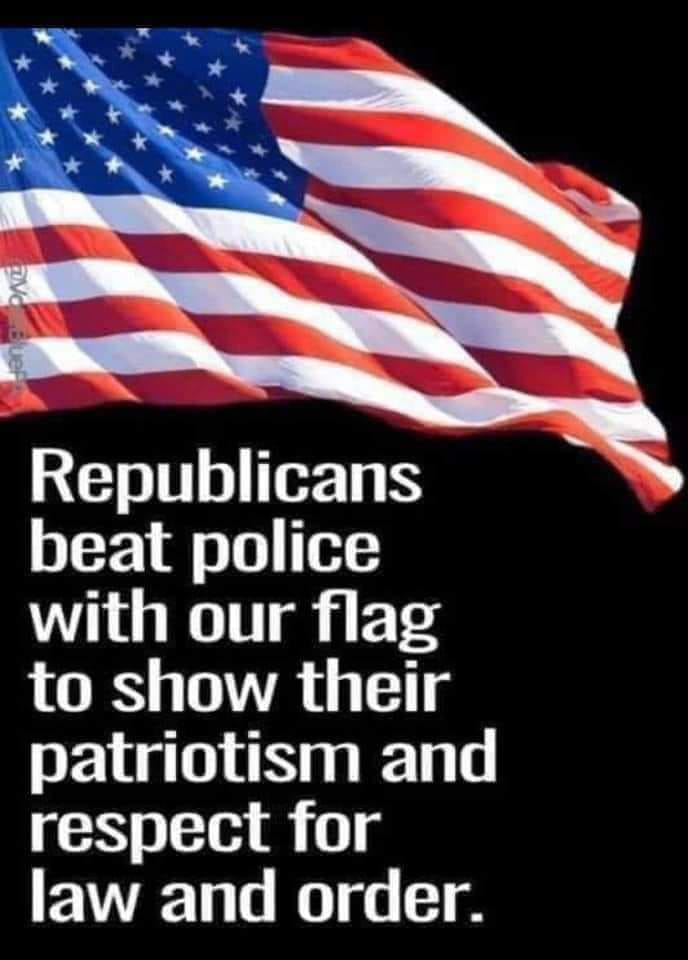



Me puts a whole pig in a smoker because its the 4th of July The rest of the police department


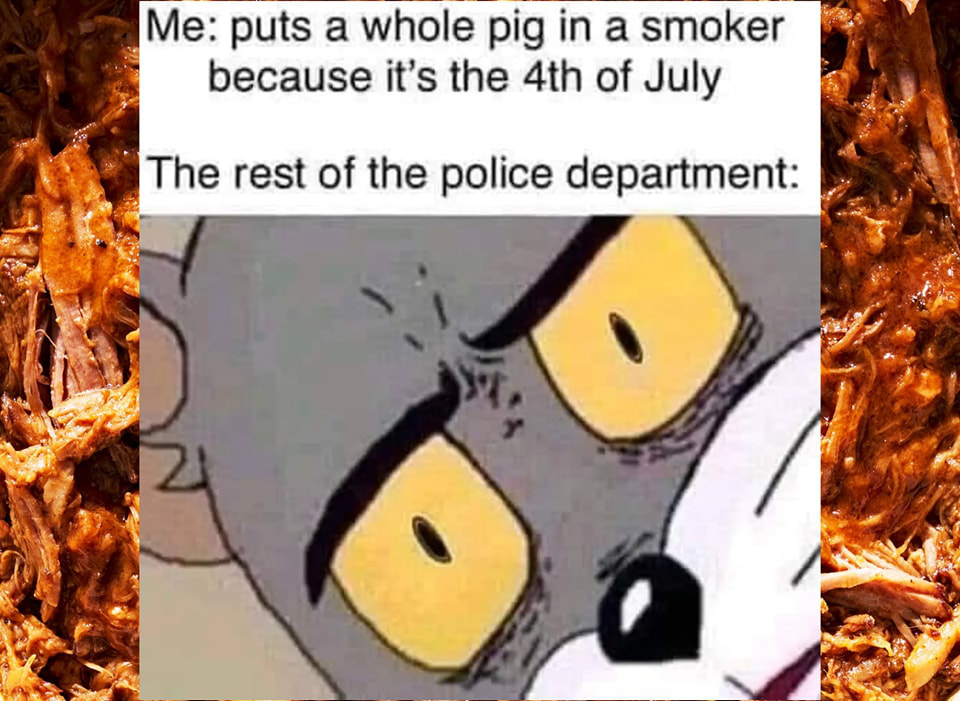

In [2]:
# !pip install easyocr
import os
from PIL import Image
import easyocr
import re

# Dictionary of common contractions
contractions = {
    "don t": "don't",
    "won t": "won't",
    "can t": "can't",
    "i m": "i'm",
    "isn t": "isn't",
    "aren t": "aren't",
    "wasn t": "wasn't",
    "weren t": "weren't",
    "hasn t": "hasn't",
    "haven t": "haven't",
    "hadn t": "hadn't",
    "doesn t": "doesn't",
    "don t": "don't",
    "didn t": "didn't",
    "won t": "won't",
    "wouldn t": "wouldn't",
    "shan t": "shan't",
    "shouldn t": "shouldn't",
    "mightn t": "mightn't",
    "mustn t": "mustn't",
    "i ve": "i've",
    "you ve": "you've",
    "we ve": "we've",
    "they ve": "they've",
    "i ll": "i'll",
    "you ll": "you'll",
    "he ll": "he'll",
    "she ll": "she'll",
    "we ll": "we'll",
    "they ll": "they'll",
    "i d": "i'd",
    "you d": "you'd",
    "he d": "he'd",
    "she d": "she'd",
    "we d": "we'd",
    "they d": "they'd",
    "let s": "let's",
    "that s": "that's",
    "who s": "who's",
    "what s": "what's",
    "where s": "where's",
    "when s": "when's",
    "why s": "why's",
    "how s": "how's"
}

def remove_punctuation(text):
    # Use regular expressions to remove all punctuation
    return re.sub(r'[^a-zA-Z\s0-9\.\-]', '', text)
    
def combine_contractions(text):
    # Replace contractions in the text
    for contraction, full_form in contractions.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text
        
def extract_text_from_image(image_path):
    reader = easyocr.Reader(['en'])  # This example is for English; add more languages as needed
    result = reader.readtext(image_path, 
                             batch_size=5,
                             # detail=0.5,
                             # batch_size=10,
                             # rotation_info=[90, 180, 270],
                             width_ths=0.8, #controls when adjacent bounding boxes merge with each other
                             contrast_ths=0.2, #Text box with contrast lower than this value will be passed into model 2 times.
                             paragraph=True,
                             detail=0, #outputs list of words instead of tuple
                            )    
    text = ' '.join([res for res in result])
    return text

def rename_with_OCR(path):
    files = [_ for _ in os.listdir(path) 
             if _.endswith(('.jpg', '.jpeg', '.png'))]
    for f_name in files:
        text = extract_text_from_image(f'{path}{f_name}')
        text = remove_punctuation(text)
        text = combine_contractions(text)
        # text = correct_spelling_SpellChecker(text) #correcting spelling means you lose names and 'boomer', so I'm leaving it out
        text = ' '.join([_.strip() for _ in text.split()])
        text = text[:240] #truncate to not mess with file system
        print(text)
        if len(text.strip()) > 5:
            extension = f_name.split('.')[-1]
            current_file_path = f'{path}{f_name}'
            new_folder = f"renamed-{path.split('/')[-2]}"
            os.makedirs(path+new_folder, exist_ok=True)
            new_file_path = f'{path+new_folder}/{text}.{extension}'
            os.rename(current_file_path, new_file_path)
            display(Image.open(new_file_path))
        print('\n')

rename_with_OCR('/Users/YOUR_USER_NAME/Desktop/Right-wing Memes/')